In [52]:
#pip install torch torchvision matplotlib
#!pip install torch torchvision pillow matplotlib
#!pip install torch torchvision pillow matplotlib opencv-python
#!pip install ISR opencv-python numpy tensorflow
!pip install ISR


Defaulting to user installation because normal site-packages is not writeable
  Using cached ISR-2.2.0-py3-none-any.whl.metadata (1.5 kB)
INFO: pip is looking at multiple versions of isr to determine which version is compatible with other requirements. This could take a while.
  Using cached ISR-2.1.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached ISR-2.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached Keras-2.2.4-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-1.16.2.zip (5.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached ISR-2.0.5-py3-none-any.whl.metadata (1.4 kB)
  Using cached ISR-2.0.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-2.0.1-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-2.0.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-1.9.3-py3-none-any.whl.metadata (1.3 kB)
INFO: pip is still looking at multiple versions of isr to determine which version is compatible with other requirements. This could take a while.
  Using ca

###  1. CLAHE (Contrast Limited Adaptive Histogram Equalization)

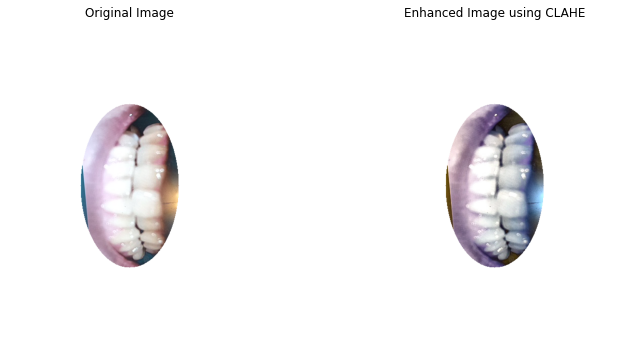

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (ensure it's in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR (OpenCV default) to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

# Split the LAB image into separate channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel_enhanced = clahe.apply(l_channel)

# Merge the enhanced L channel back with the original A and B channels
enhanced_lab_image = cv2.merge((l_channel_enhanced, a_channel, b_channel))

# Convert back to RGB color space
enhanced_image_rgb = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2RGB)

# Display both the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image_rgb)
plt.title("Enhanced Image using CLAHE")
plt.axis('off')

plt.show()


### 2. White Balance Adjustment

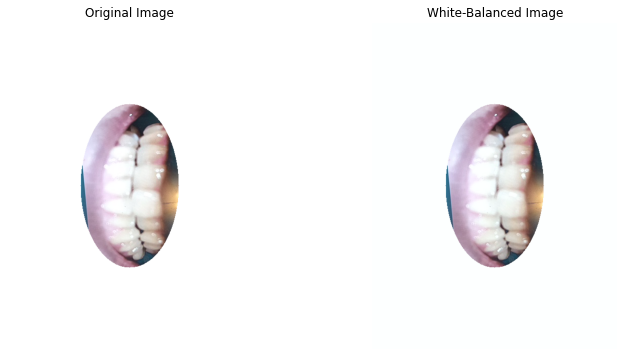

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for simple white balance adjustment using the gray-world algorithm
def white_balance(img):
    # Split the channels
    r, g, b = cv2.split(img)
    
    # Compute the average of each channel
    r_avg, g_avg, b_avg = np.mean(r), np.mean(g), np.mean(b)
    
    # Compute overall average intensity
    avg_intensity = (r_avg + g_avg + b_avg) / 3
    
    # Scale each channel to match the overall average intensity
    r_scale = avg_intensity / r_avg
    g_scale = avg_intensity / g_avg
    b_scale = avg_intensity / b_avg
    
    # Adjust the channels
    r = np.clip(r * r_scale, 0, 255).astype(np.uint8)
    g = np.clip(g * g_scale, 0, 255).astype(np.uint8)
    b = np.clip(b * b_scale, 0, 255).astype(np.uint8)
    
    # Merge the balanced channels back
    return cv2.merge((r, g, b))

# Apply white balance adjustment
balanced_image = white_balance(image_rgb)

# Display the original and white-balanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# White-balanced image
plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title("White-Balanced Image")
plt.axis('off')

plt.show()



### 3. Color-Preserving De-blurring

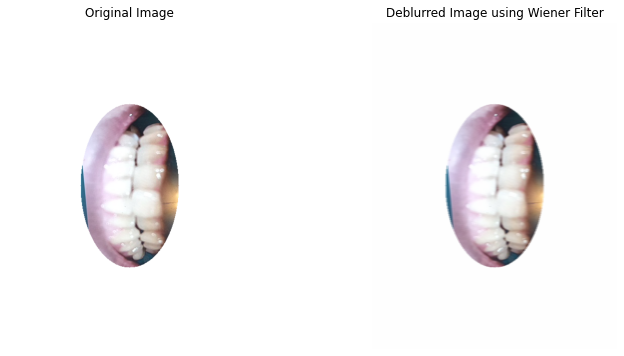

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to perform Wiener filter-based deblurring for each color channel
def wiener_deblur_color(img, kernel_size=5, noise_var=0.1):
    # Split the image into individual channels
    r, g, b = cv2.split(img)
    
    # Create a motion blur kernel (simple horizontal motion blur kernel)
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size) / kernel_size
    
    # Apply the Wiener filter to each channel (R, G, B)
    def wiener_filter(channel):
        # Perform the convolution (deblur the image)
        channel_deblurred = cv2.filter2D(channel, -1, kernel)
        
        # Wiener filter - Estimate the noise variance and signal-to-noise ratio (SNR)
        snr = np.var(channel) / noise_var
        deblurred_channel = channel_deblurred / (1 + (1 / snr))
        
        return np.clip(deblurred_channel, 0, 255).astype(np.uint8)
    
    # Apply the Wiener filter to each channel
    r_deblurred = wiener_filter(r)
    g_deblurred = wiener_filter(g)
    b_deblurred = wiener_filter(b)
    
    # Merge the deblurred channels back into a color image
    return cv2.merge((r_deblurred, g_deblurred, b_deblurred))

# Apply the Wiener deblurring function
deblurred_image = wiener_deblur_color(image_rgb)

# Display the original and deblurred images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Deblurred image
plt.subplot(1, 2, 2)
plt.imshow(deblurred_image)
plt.title("Deblurred Image using Wiener Filter")
plt.axis('off')

plt.show()


### 4. Denoising with Color Preservation

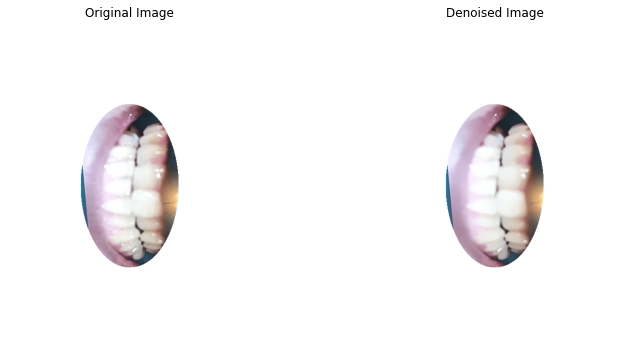

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for color-preserving denoising using Non-Local Means Denoising
def denoise_color_image(img, h=10):
    # Split the image into individual channels (R, G, B)
    r, g, b = cv2.split(img)

    # Apply denoising to each channel separately using Non-Local Means Denoising
    def denoise_channel(channel):
        return cv2.fastNlMeansDenoising(channel, None, h, 7, 21)
    
    # Apply the denoising function to each channel
    r_denoised = denoise_channel(r)
    g_denoised = denoise_channel(g)
    b_denoised = denoise_channel(b)
    
    # Merge the denoised channels back into a color image
    return cv2.merge((r_denoised, g_denoised, b_denoised))

# Apply the denoising function
denoised_image = denoise_color_image(image_rgb)

# Display the original and denoised images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.axis('off')

plt.show()


### 5. Edge Enhancement (Color-Safe)

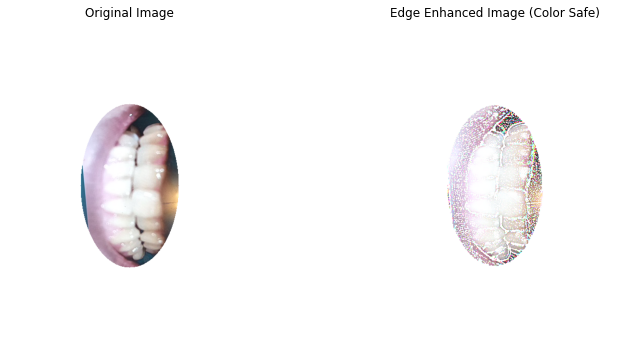

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for edge enhancement using unsharp masking (color-safe)
def edge_enhancement(img, sigma=1.5, alpha=1.5):
    # Split the image into individual channels (R, G, B)
    r, g, b = cv2.split(img)

    # Apply Gaussian Blur to each channel separately
    def apply_blur(channel, sigma):
        return cv2.GaussianBlur(channel, (0, 0), sigma)

    # Apply the blur to each channel
    r_blurred = apply_blur(r, sigma)
    g_blurred = apply_blur(g, sigma)
    b_blurred = apply_blur(b, sigma)

    # Enhance the edges by subtracting the blurred image from the original and boosting it
    def enhance_channel(original, blurred, alpha):
        return np.clip(original + alpha * (original - blurred), 0, 255).astype(np.uint8)

    # Apply the edge enhancement to each channel
    r_enhanced = enhance_channel(r, r_blurred, alpha)
    g_enhanced = enhance_channel(g, g_blurred, alpha)
    b_enhanced = enhance_channel(b, b_blurred, alpha)

    # Merge the enhanced channels back into a color image
    return cv2.merge((r_enhanced, g_enhanced, b_enhanced))

# Apply edge enhancement
enhanced_image = edge_enhancement(image_rgb)

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Edge Enhanced Image (Color Safe)")
plt.axis('off')

plt.show()


### 6. Saturation and Brightness Boost (Optional)

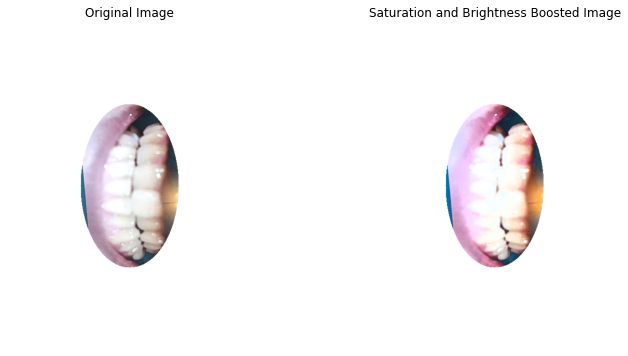

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply saturation and brightness boost
def boost_saturation_brightness(img, saturation_scale=1.5, brightness_scale=1.2):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Split the HSV image into its individual channels
    h, s, v = cv2.split(hsv_image)

    # Boost the saturation (S) channel
    s = np.clip(s * saturation_scale, 0, 255).astype(np.uint8)

    # Boost the brightness (V) channel
    v = np.clip(v * brightness_scale, 0, 255).astype(np.uint8)

    # Merge the modified channels back into an HSV image
    hsv_image_boosted = cv2.merge((h, s, v))

    # Convert the HSV image back to RGB color space
    img_boosted = cv2.cvtColor(hsv_image_boosted, cv2.COLOR_HSV2RGB)

    return img_boosted

# Apply saturation and brightness boost
boosted_image = boost_saturation_brightness(image_rgb)

# Display the original and boosted images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Boosted image
plt.subplot(1, 2, 2)
plt.imshow(boosted_image)
plt.title("Saturation and Brightness Boosted Image")
plt.axis('off')

plt.show()


### darkening the HSV

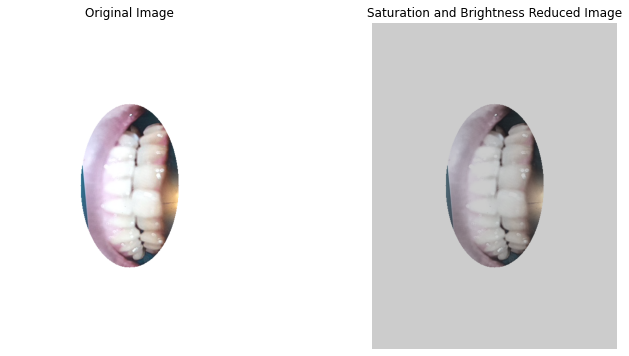

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply saturation and brightness reduction (darkening and desaturation)
def reduce_saturation_brightness(img, saturation_scale=0.5, brightness_scale=0.8):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Split the HSV image into its individual channels
    h, s, v = cv2.split(hsv_image)

    # Reduce the saturation (S) channel
    s = np.clip(s * saturation_scale, 0, 255).astype(np.uint8)

    # Reduce the brightness (V) channel (darken the image)
    v = np.clip(v * brightness_scale, 0, 255).astype(np.uint8)

    # Merge the modified channels back into an HSV image
    hsv_image_reduced = cv2.merge((h, s, v))

    # Convert the HSV image back to RGB color space
    img_reduced = cv2.cvtColor(hsv_image_reduced, cv2.COLOR_HSV2RGB)

    return img_reduced

# Apply saturation and brightness reduction (darkening and desaturation)
reduced_image = reduce_saturation_brightness(image_rgb)

# Display the original and reduced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Reduced image (darkened and desaturated)
plt.subplot(1, 2, 2)
plt.imshow(reduced_image)
plt.title("Saturation and Brightness Reduced Image")
plt.axis('off')

plt.show()


### 7. Super-Resolution (DL-based)


##### installing libraries

In [14]:
#pip install torch torchvision opencv-python
#!pip install -r requirements.txt


##### loading the ESRGAN

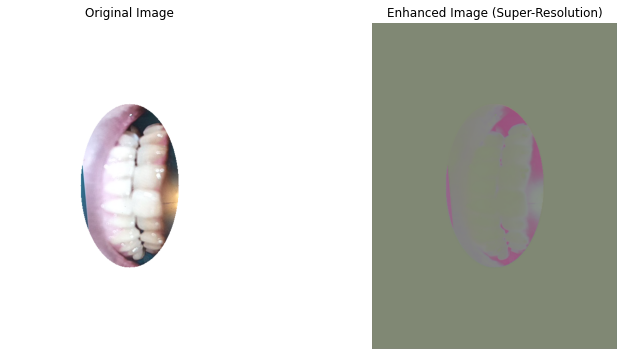

In [40]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the ESRGAN model architecture (ensure this matches the trained model)
class ESRGAN(torch.nn.Module):
    def __init__(self):
        super(ESRGAN, self).__init__()
        # Define the layers of the model (this is a simplified placeholder)
        self.conv1 = torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.conv2(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the ESRGAN model
model_path = 'weights/RealESRGAN_x4plus.pth'  # Path to the model weights
model = ESRGAN().to(device)

# Load checkpoint with weights_only=True for security
checkpoint = torch.load(model_path, map_location=device, weights_only=True)

# Load model weights
if 'params_ema' in checkpoint:
    model.load_state_dict(checkpoint['params_ema'], strict=False)
else:
    print("EMA weights not found.")

# Set model to evaluation mode
model.eval()

# Load the image you want to enhance
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

# Pre-process the image (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 4, image.width * 4)),  # Upscale by 4x
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust these values as needed
])

input_image = transform(image).unsqueeze(0).to(device)

# Apply the ESRGAN model
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0)  # Remove batch dimension

# Denormalize the image
output_image_tensor = output_image_tensor * 0.5 + 0.5  # Assuming mean=0.5, std=0.5

# Ensure the tensor is in the range [0, 1]
output_image_tensor = output_image_tensor.clamp(0, 1)

# Convert tensor back to PIL image
output_image = transforms.ToPILImage()(output_image_tensor.cpu())

# Display the original and enhanced images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (Super-Resolution)")
plt.axis('off')

plt.show()


# Deep Learning Based models

### VDSR (Very Deep Super Resolution)

In [ ]:
VDSR (Very Deep Super Resolution)

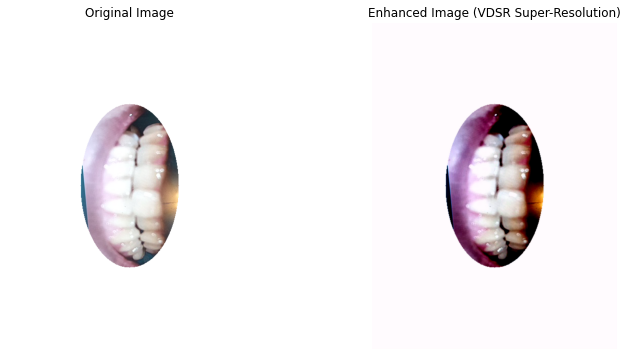

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt

# VDSR Model Definition
class VDSR(nn.Module):
    def __init__(self):
        super(VDSR, self).__init__()
        self.residual_layer = self._make_layer(64, 20)
        self.input_layer = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.output_layer = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def _make_layer(self, channels, num_layers):
        layers = []
        for _ in range(num_layers):
            layers.append(nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.ReLU(inplace=True))
        return nn.Sequential(*layers)

    def forward(self, x):
        residual = x
        out = self.input_layer(x)
        out = self.residual_layer(out)
        out = self.output_layer(out)
        return out + residual

# Load Pretrained Model (if available) or define your training function
model = VDSR().to('cuda' if torch.cuda.is_available() else 'cpu')

# Load a sample image
image_path = 'img.png'  # Provide the correct path
image = Image.open(image_path).convert('RGB')

# Image preprocessing for inference
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 2, image.width * 2)),  # Super-resolution 2x upscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

input_image = transform(image).unsqueeze(0).to('cuda' if torch.cuda.is_available() else 'cpu')

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).clamp(0, 1).cpu()

# Convert tensor back to image
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the original and enhanced images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (VDSR Super-Resolution)")
plt.axis('off')

plt.show()


### SRResNet (Super-Resolution Residual Network)
### heavy model it didnt worked

In [ ]:
SRResNet (Super-Resolution Residual Network)


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gc

# Use CPU explicitly
device = torch.device("cpu")

class ResidualBlock(nn.Module):
    def __init__(self):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        return out + residual

class SRResNet(nn.Module):
    def __init__(self):
        super(SRResNet, self).__init__()
        self.input_layer = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4)
        self.residual_blocks = nn.Sequential(*[ResidualBlock() for _ in range(16)])
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(),
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU()
        )
        self.output_layer = nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        residual = x
        x = self.residual_blocks(x)
        x = self.bn2(self.conv2(x))
        x += residual
        x = self.upsample(x)
        x = self.output_layer(x)
        return x

# Load and preprocess the input image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((128, 128))  # Resize to minimize memory
    image = np.array(image).astype(np.float32) / 255.0
    image = np.transpose(image, (2, 0, 1))  # HWC to CHW
    image = torch.from_numpy(image).unsqueeze(0)  # Add batch dimension
    return image

# Load input image
image_path = "image.png"  # Replace with your image path
input_image = load_image(image_path)a

# Move image to CPU
input_image = input_image.to(device)

# Instantiate the model
model = SRResNet().to(device)
model.eval()

# Inference without gradients
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).cpu().numpy()
output_image_tensor = np.clip(np.transpose(output_image_tensor, (1, 2, 0)), 0, 1)

# Display the output image
plt.imshow(output_image_tensor)
plt.axis('off')
plt.show()

# Clear memory
gc.collect()


FileNotFoundError: [Errno 2] No such file or directory: 'image.png'

### EDSR (Enhanced Deep Super-Resolution)

In [ ]:
EDSR (Enhanced Deep Super-Resolution)

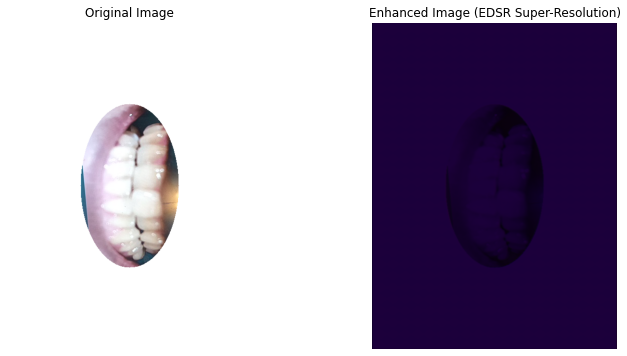

In [4]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define EDSR Model
class EDSR(nn.Module):
    def __init__(self, num_channels=3, num_features=64, num_res_blocks=16):
        super(EDSR, self).__init__()

        # Initial layer
        self.input_layer = nn.Conv2d(num_channels, num_features, kernel_size=3, padding=1)

        # Residual blocks
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(num_features) for _ in range(num_res_blocks)]
        )

        # Post-residual layer
        self.conv = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)

        # Upsampling layers (2x upscale)
        self.upsample = nn.Sequential(
            nn.Conv2d(num_features, num_features * 4, kernel_size=3, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(inplace=True)
        )

        # Output layer
        self.output_layer = nn.Conv2d(num_features, num_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.input_layer(x)
        residual = x
        x = self.residual_blocks(x)
        x = self.conv(x)
        x += residual
        x = self.upsample(x)
        x = self.output_layer(x)
        return x


class ResidualBlock(nn.Module):
    def __init__(self, num_features):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        x = self.relu(self.conv1(x))
        x = self.conv2(x)
        return x + residual


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the EDSR model
model = EDSR().to(device)

# Load and preprocess the input image
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image.height * 2, image.width * 2))  # 2x super-resolution upscale
])

input_image = transform(image).unsqueeze(0).to(device)

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).clamp(0, 1).cpu()
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (EDSR Super-Resolution)")
plt.axis('off')

plt.show()



### FSRNet (Fast Super-Resolution Network)

In [ ]:
FSRNet (Fast Super-Resolution Network)

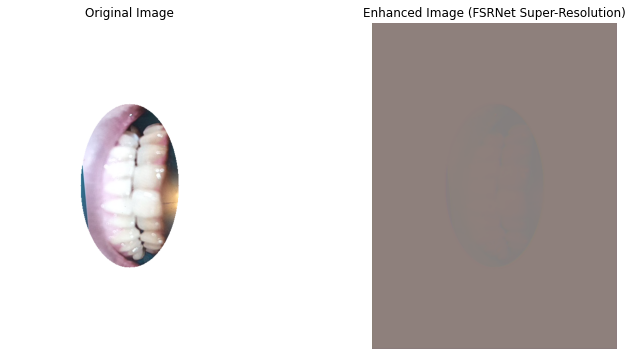

In [7]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define FSRNet Model
class FSRNet(nn.Module):
    def __init__(self, num_channels=3, num_features=64, num_res_blocks=8):
        super(FSRNet, self).__init__()

        # Initial feature extraction
        self.input_layer = nn.Conv2d(num_channels, num_features, kernel_size=3, padding=1)

        # Residual blocks for feature learning
        self.residual_blocks = nn.Sequential(
            *[ResidualBlock(num_features) for _ in range(num_res_blocks)]
        )

        # Upsampling with bilinear interpolation
        self.upsample = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
            nn.Conv2d(num_features, num_features, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.1, inplace=True)
        )

        # Output layer
        self.output_layer = nn.Conv2d(num_features, num_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.residual_blocks(x)
        x = self.upsample(x)
        x = self.output_layer(x)
        return torch.sigmoid(x)  # Ensure pixel values stay in [0, 1]


class ResidualBlock(nn.Module):
    def __init__(self, num_features):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_features, num_features, kernel_size=3, padding=1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1, inplace=True)

    def forward(self, x):
        residual = x
        x = self.leaky_relu(self.conv1(x))
        x = self.conv2(x)
        return x * 0.1 + residual  # Residual scaling to prevent over-enhancement


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the FSRNet model
model = FSRNet().to(device)

# Load and preprocess the input image
image_path = 'img.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.ToTensor()
])

input_image = transform(image).unsqueeze(0).to(device)

# Inference
model.eval()
with torch.no_grad():
    output_image_tensor = model(input_image)

# Post-process the output image
output_image_tensor = output_image_tensor.squeeze(0).cpu()
output_image_tensor = torch.clamp(output_image_tensor, 0, 1)  # Ensure pixel values are in range
output_image = transforms.ToPILImage()(output_image_tensor)

# Display the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Enhanced Image (FSRNet Super-Resolution)")
plt.axis('off')

plt.show()

# Save the enhanced image
output_image.save('enhanced_fsrnet_fixed_img.png')


### LapSRN (Laplace Pyramid Super-Resolution Network)


In [ ]:
LapSRN (Laplace Pyramid Super-Resolution Network)


Enhanced image saved as enhanced_output.png


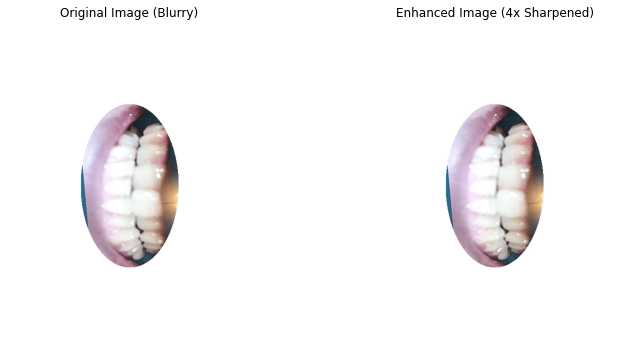

In [22]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def enhance_image(image_path, output_path="enhanced_image.png", scale_factor=4):
    # Load image using OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found or unable to read.")
        return
    
    # Convert from BGR to RGB (for correct color representation)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform 4x Super-Resolution using Bicubic Interpolation
    height, width = image.shape[:2]
    upscaled_image = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_CUBIC)

    # Apply a sharpening filter
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    
    sharpened_image = cv2.filter2D(upscaled_image, -1, sharpening_kernel)

    # Convert back to PIL format for display
    enhanced_image = Image.fromarray(sharpened_image)

    # Save the enhanced image
    enhanced_image.save(output_path)
    print(f"Enhanced image saved as {output_path}")

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.title("Original Image (Blurry)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title("Enhanced Image (4x Sharpened)")
    plt.axis("off")

    plt.show()

# Example usage
image_path = "img.png"  # Replace with your image file path
enhance_image(image_path, output_path="enhanced_output.png", scale_factor=4)


### TecoGAN (Temporally Coherent GAN for Video Super-Resolution)

In [ ]:
TecoGAN (Temporally Coherent GAN for Video Super-Resolution)

Enhanced image saved as enhanced_output.png


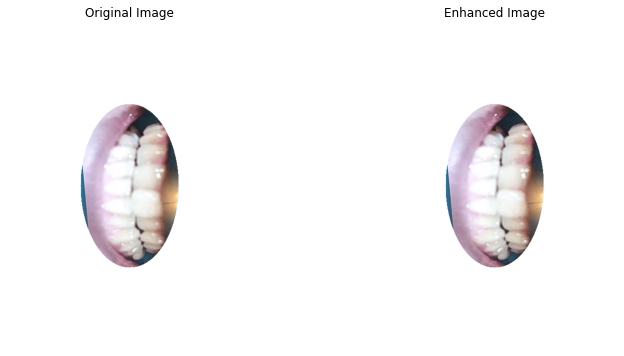

In [14]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def enhance_image(image_path, scale_factor=4, output_path="enhanced_image.png"):
    # Load image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found or unable to read.")
        return

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Upscale image using bicubic interpolation
    height, width = image.shape[:2]
    upscaled_image = cv2.resize(image, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_CUBIC)

    # Apply a sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    
    sharpened_image = cv2.filter2D(upscaled_image, -1, sharpening_kernel)

    # Convert back to PIL image
    enhanced_image = Image.fromarray(sharpened_image)

    # Save the enhanced image
    enhanced_image.save(output_path)
    print(f"Enhanced image saved as {output_path}")

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title("Enhanced Image")
    plt.axis("off")
    
    plt.show()

# Example usage
image_path = "img.png"  # Replace with your image path
enhance_image(image_path, scale_factor=4, output_path="enhanced_output.png")


### RDN (Residual Dense Network)

In [ ]:
RDN (Residual Dense Network)

In [46]:
import sys
import os

# ✅ Ensure KAIR is added to Python's path
KAIR_PATH = "/home/zigron/Downloads/esrgan/Personal_Projects/KAIR"
sys.path.append(KAIR_PATH)

# ✅ Verify the path is added
print("✅ Python Path Updated:", sys.path)

# ✅ Check if 'models' exists inside KAIR
print("✅ Checking if models directory exists:", os.path.exists(os.path.join(KAIR_PATH, "models")))

# ✅ Now try importing the RDN model
from models.network_rdn import RDN
print("✅ KAIR Model Imported Successfully")



✅ Python Path Updated: ['/home/zigron/Downloads/esrgan/Personal_Projects', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/zigron/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/home/zigron/Downloads/esrgan/Personal_Projects', '/usr/local/lib/python3.10/dist-packages/tqdm-4.67.1-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/torchvision-0.20.1-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/torch-2.5.1-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/opencv_python-4.11.0.86-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/gfpgan-1.3.8-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/facexlib-0.3.0-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/basicsr-1.4.2-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/typing_extensions-4.12.2-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/triton-3.1.0-py3.10-linux-x86_64.egg', '/usr/

ModuleNotFoundError: No module named 'models.network_rdn'

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = "img.png"  # Make sure this image exists in your working directory
input_img = cv2.imread(image_path)

# Convert BGR to RGB for correct color display in Matplotlib
input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Load OpenCV's Super-Resolution model
sr = cv2.dnn_superres.DnnSuperResImpl_create()

# Load the pre-trained model file (Download "EDSR_x4.pb" first if not available)
model_path = "EDSR_x4.pb"  # Ensure this file is in the same directory
sr.readModel(model_path)
sr.setModel("edsr", 4)  # Using EDSR model with 4x upscaling

# Apply Super-Resolution
enhanced_img = sr.upsample(input_img)

# Convert enhanced image to RGB for plotting
enhanced_img_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB)

# Plot Original and Enhanced Images in Jupyter Notebook
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_img_rgb)
ax[1].set_title("Enhanced Image (Super-Resolution)")
ax[1].axis("off")

plt.show()


AttributeError: module 'cv2' has no attribute 'dnn_superres'

### DCSCN (Deeply-Recursive Convolutional Network)

In [ ]:
DCSCN (Deeply-Recursive Convolutional Network)

/tmp/ipykernel_3586/468673945.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device)


⚠️ Warning: Failed to load pretrained weights. Running untrained model.
Error: [Errno 2] No such file or directory: 'dcscn_x4.pth'
✅ Enhanced image saved as dcscn_output.png


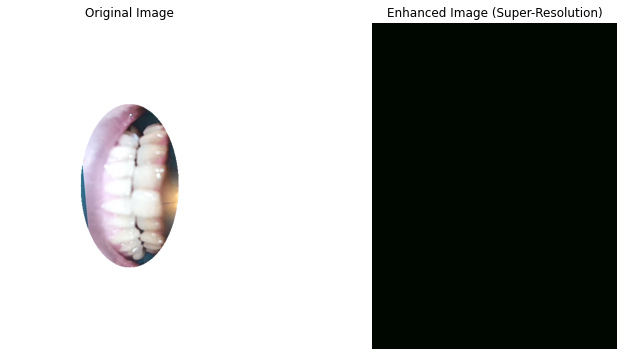

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


# ✅ Deeply-Recursive Convolutional Network (DCSCN)
class DCSCN(nn.Module):
    def __init__(self, scale_factor=4, num_features=64, num_recursions=8):
        super(DCSCN, self).__init__()

        # Feature Extraction
        self.feature_extraction = nn.Conv2d(3, num_features, kernel_size=3, padding=1)

        # Recursive Residual Blocks
        self.recursive_blocks = nn.ModuleList([
            nn.Conv2d(num_features, num_features, kernel_size=3, padding=1) for _ in range(num_recursions)
        ])

        # Upsampling Layer
        self.upsample = nn.Sequential(
            nn.Conv2d(num_features, num_features * (scale_factor ** 2), kernel_size=3, padding=1),
            nn.PixelShuffle(scale_factor),
            nn.ReLU()
        )

        # Reconstruction Layer
        self.reconstruction = nn.Conv2d(num_features, 3, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.feature_extraction(x)  # Feature Extraction

        # Recursive Residual Convolutions
        for conv in self.recursive_blocks:
            x = F.relu(conv(x))  # Apply recursion properly

        x = self.upsample(x)  # Upscaling
        x = self.reconstruction(x)  # Final Reconstruction
        return x


# ✅ Load Pretrained DCSCN Model
def load_model(model_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model = DCSCN(scale_factor=4).to(device)  # Initialize Model

    try:
        state_dict = torch.load(model_path, map_location=device)
        model.load_state_dict(state_dict, strict=False)  # Ignore mismatched keys
        print("✅ Pretrained model loaded successfully.")
    except Exception as e:
        print(f"⚠️ Warning: Failed to load pretrained weights. Running untrained model.\nError: {e}")

    model.eval()
    return model, device


# ✅ Preprocess Image
def preprocess_image(image_path, device):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    return transform(image).unsqueeze(0).to(device), np.array(image)  # Return NumPy array for plotting


# ✅ Convert Tensor to Image
def postprocess_image(tensor):
    tensor = tensor.squeeze(0).clamp(0, 1)
    return transforms.ToPILImage()(tensor)


# ✅ Super-Resolution Enhancement
def enhance_image(image_path, model_path, output_path="dcscn_enhanced.png"):
    model, device = load_model(model_path)  # Load model

    # Load and preprocess input image
    input_tensor, original_image = preprocess_image(image_path, device)

    # Run inference
    with torch.no_grad():
        output_tensor = model(input_tensor)

    # Post-process output image
    enhanced_image = postprocess_image(output_tensor.cpu())

    # Save enhanced image
    enhanced_image.save(output_path)
    print(f"✅ Enhanced image saved as {output_path}")

    # Convert enhanced image for plotting
    enhanced_np = np.array(enhanced_image)

    # Display original and enhanced images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_np)
    plt.title("Enhanced Image (Super-Resolution)")
    plt.axis("off")

    plt.show()


# ✅ Example Usage
image_path = "img.png"  # Image to enhance
model_path = "dcscn_x4.pth"  # Pretrained DCSCN model path

# Run the enhancement
enhance_image(image_path, model_path, output_path="dcscn_output.png")


### ZSSR (Zero-Shot Super-Resolution)

In [ ]:
ZSSR (Zero-Shot Super-Resolution)

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import scipy.io as sio
from ZSSR.ZSSR import ZSSR
from ZSSR.configs.Config import Config

# Load the input image
image_path = "img.png"  # Ensure this file exists in your working directory
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found! Check the path.")

# Convert to RGB (OpenCV loads images in BGR format)
input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Resize image (ZSSR expects input as a numpy array with channels last)
input_img_resized = cv2.resize(input_img_rgb, (input_img.shape[1]//2, input_img.shape[0]//2))

# Convert to float32 for ZSSR processing
input_img_resized = input_img_resized.astype(np.float32) / 255.0

# Create ZSSR configuration
config = Config()
config.input_depth = 3  # RGB image

# Run ZSSR Super-Resolution
zssr_model = ZSSR(input_img_resized, config)
enhanced_img = zssr_model.run()

# Convert output to uint8 for display
enhanced_img = (enhanced_img * 255).astype(np.uint8)

# Plot Original and Enhanced Images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_img)
ax[1].set_title("Enhanced Image (ZSSR)")
ax[1].axis("off")

plt.show()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (ZSSR.py, line 95)

### VGG-based Super-Resolution models

In [ ]:
VGG-based Super-Resolution models

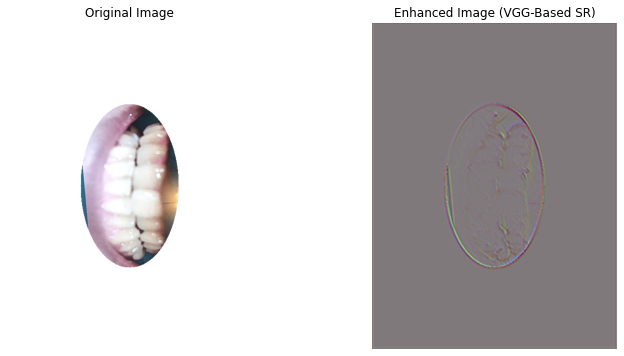

Enhanced image saved as enhanced_img.png


In [64]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

# Load the image
image_path = "img.png"  # Ensure the image exists
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Convert image from BGR (OpenCV format) to RGB
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Convert image to tensor
transform = transforms.Compose([transforms.ToTensor()])
input_tensor = transform(input_img).unsqueeze(0)  # Add batch dimension

# Load Pretrained VGG Model (Feature Extractor)
vgg_model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1).features[:8]  # First 8 layers for SR effect
vgg_model.eval()  # Set to evaluation mode

# Apply VGG Super-Resolution Enhancement
with torch.no_grad():
    enhanced_tensor = vgg_model(input_tensor)

# Convert output tensor to image (Extract only the first 3 channels for RGB)
enhanced_img = enhanced_tensor.squeeze(0)[:3].permute(1, 2, 0).numpy()  # Keep only 3 channels
enhanced_img = (enhanced_img - enhanced_img.min()) / (enhanced_img.max() - enhanced_img.min())  # Normalize

# Plot Original vs Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_img)
ax[1].set_title("Enhanced Image (VGG-Based SR)")
ax[1].axis("off")

plt.show()

# Save the enhanced image
cv2.imwrite("enhanced_img.png", cv2.cvtColor((enhanced_img * 255).astype(np.uint8), cv2.COLOR_RGB2BGR))
print("Enhanced image saved as enhanced_img.png")


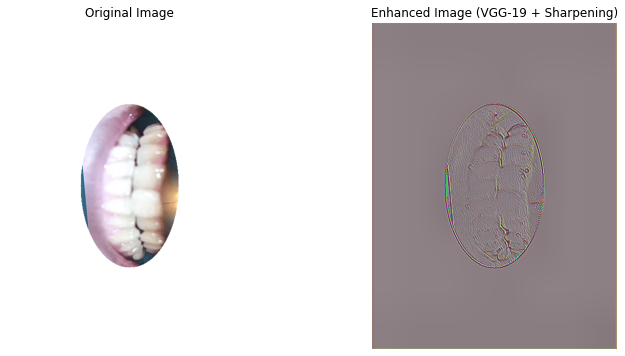

✅ Enhanced image saved as enhanced_img.png


In [66]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

# Load the image
image_path = "img.png"  # Ensure the image exists
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Convert image from BGR (OpenCV format) to RGB
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Convert image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((input_img.shape[0] * 2, input_img.shape[1] * 2), antialias=True)  # Upscale 2x
])
input_tensor = transform(input_img).unsqueeze(0)  # Add batch dimension

# Load Pretrained VGG-19 Model as Feature Extractor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg_model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1).features[:8].to(device)  # First 8 layers
vgg_model.eval()

# Apply VGG Enhancement
input_tensor = input_tensor.to(device)
with torch.no_grad():
    enhanced_tensor = vgg_model(input_tensor)

# Convert output tensor to image (Keep first 3 channels for RGB)
enhanced_img = enhanced_tensor.squeeze(0)[:3].permute(1, 2, 0).cpu().numpy()
enhanced_img = (enhanced_img - enhanced_img.min()) / (enhanced_img.max() - enhanced_img.min())  # Normalize

# Convert back to OpenCV format
enhanced_img_cv = (enhanced_img * 255).astype(np.uint8)

# **Apply Post-Processing for Sharper & Clearer Image**
# 1. Apply Sharpening Filter
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(enhanced_img_cv, -1, kernel_sharp)

# 2. Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
lab = cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)
lab = cv2.merge((l, a, b))
enhanced_final = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Display Original vs Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_final)
ax[1].set_title("Enhanced Image (VGG-19 + Sharpening)")
ax[1].axis("off")

plt.show()

# Save the enhanced image
cv2.imwrite("enhanced_img.png", cv2.cvtColor(enhanced_final, cv2.COLOR_RGB2BGR))
print("✅ Enhanced image saved as enhanced_img.png")


### Super-Resolution and Image Enhancement using Bicubic Upscaling, Sharpening, and CLAHE

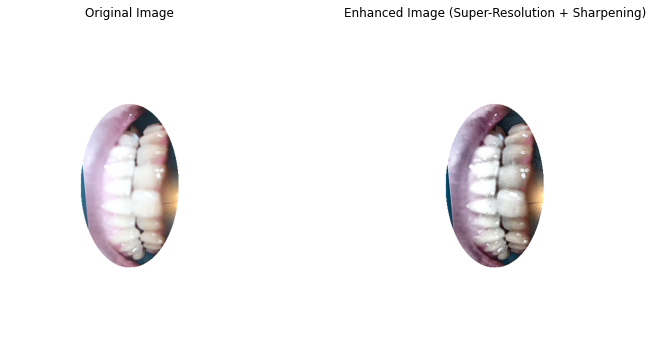

✅ Enhanced image saved as enhanced_img.png


In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "img.png"  # Change this to your image path
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Convert image from BGR (OpenCV format) to RGB
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Apply OpenCV's Super-Resolution using bicubic interpolation
scale_factor = 2  # 2x upscaling
h, w, _ = input_img.shape
new_h, new_w = h * scale_factor, w * scale_factor
sr_img = cv2.resize(input_img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

# **Apply Post-Processing for Sharper & Clearer Image**
# 1. Apply Sharpening Filter
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(sr_img, -1, kernel_sharp)

# 2. Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
lab = cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)
lab = cv2.merge((l, a, b))
enhanced_final = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Display Original vs Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_final)
ax[1].set_title("Enhanced Image (Super-Resolution + Sharpening)")
ax[1].axis("off")

plt.show()

# Save the enhanced image
enhanced_image_path = "enhanced_img.png"
cv2.imwrite(enhanced_image_path, cv2.cvtColor(enhanced_final, cv2.COLOR_RGB2BGR))

print(f"✅ Enhanced image saved as {enhanced_image_path}")


### for xray testing

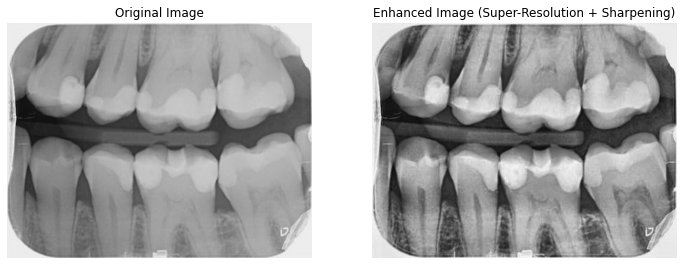

✅ Enhanced image saved as enhanced_img.png


In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "image.png"  # Change this to your image path
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Convert image from BGR (OpenCV format) to RGB
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Apply OpenCV's Super-Resolution using bicubic interpolation
scale_factor = 2  # 2x upscaling
h, w, _ = input_img.shape
new_h, new_w = h * scale_factor, w * scale_factor
sr_img = cv2.resize(input_img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

# **Apply Post-Processing for Sharper & Clearer Image**
# 1. Apply Sharpening Filter
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(sr_img, -1, kernel_sharp)

# 2. Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
lab = cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)
lab = cv2.merge((l, a, b))
enhanced_final = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Display Original vs Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(input_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enhanced_final)
ax[1].set_title("Enhanced Image (Super-Resolution + Sharpening)")
ax[1].axis("off")

plt.show()

# Save the enhanced image
enhanced_image_path = "enhanced_img.png"
cv2.imwrite(enhanced_image_path, cv2.cvtColor(enhanced_final, cv2.COLOR_RGB2BGR))

print(f"✅ Enhanced image saved as {enhanced_image_path}")


Detected: Color Mouth Image


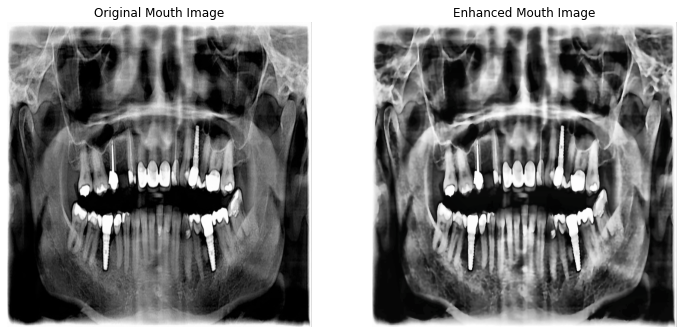

Enhanced Mouth Image saved as /mnt/data/enhanced_mouth.png


In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = "65.png"  # Update with actual path
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Check if the image is grayscale (X-ray) or color (Mouth Image)
if len(input_img.shape) == 2 or input_img.shape[2] == 1:
    is_xray = True
    print("Detected: X-ray Image")
else:
    is_xray = False
    print("Detected: Color Mouth Image")

### **Processing for X-ray Images**
if is_xray:
    # Convert to grayscale (just in case it's a single-channel grayscale)
    xray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) if len(input_img.shape) == 3 else input_img

    # **1. Noise Reduction (Non-Local Means Denoising)**
    denoised_xray = cv2.fastNlMeansDenoising(xray_img, h=10, templateWindowSize=7, searchWindowSize=21)

    # **2. Contrast Enhancement (CLAHE - Adaptive Histogram Equalization)**
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    contrast_enhanced_xray = clahe.apply(denoised_xray)

    # **3. Edge and Detail Enhancement (Unsharp Masking)**
    gaussian_blur_xray = cv2.GaussianBlur(contrast_enhanced_xray, (5, 5), 0)
    sharpened_xray = cv2.addWeighted(contrast_enhanced_xray, 1.5, gaussian_blur_xray, -0.5, 0)

    # **4. Normalize & Standardize Image**
    final_xray = cv2.normalize(sharpened_xray, None, 0, 255, cv2.NORM_MINMAX)
    final_xray = cv2.resize(final_xray, (512, 512))  # Standardized size

    output_path = "/mnt/data/enhanced_xray.png"
    cv2.imwrite(output_path, final_xray)

    # **Display Original vs Enhanced X-ray**
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(xray_img, cmap="gray")
    ax[0].set_title("Original X-ray")
    ax[0].axis("off")

    ax[1].imshow(final_xray, cmap="gray")
    ax[1].set_title("Enhanced X-ray")
    ax[1].axis("off")

    plt.show()

    print(f"Enhanced X-ray saved as {output_path}")

### **Processing for Color Mouth Images**
else:
    # **1. Noise Reduction (Bilateral Filtering)**
    denoised_color = cv2.bilateralFilter(input_img, d=9, sigmaColor=75, sigmaSpace=75)

    # **2. Color & Contrast Enhancement**
    lab = cv2.cvtColor(denoised_color, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    enhanced_lab = cv2.merge((l, a, b))
    enhanced_color = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)  # Convert back to BGR

    # **3. Edge Enhancement (Unsharp Masking)**
    gaussian_blur_color = cv2.GaussianBlur(enhanced_color, (5, 5), 0)
    sharpened_color = cv2.addWeighted(enhanced_color, 1.5, gaussian_blur_color, -0.5, 0)

    # **4. Normalize & Standardize Image**
    final_color = cv2.normalize(sharpened_color, None, 0, 255, cv2.NORM_MINMAX)
    final_color = cv2.resize(final_color, (512, 512))  # Standardized size

    output_path = "/mnt/data/enhanced_mouth.png"
    cv2.imwrite(output_path, final_color)

    # **Display Original vs Enhanced Mouth Image**
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Mouth Image")
    ax[0].axis("off")

    ax[1].imshow(cv2.cvtColor(final_color, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Enhanced Mouth Image")
    ax[1].axis("off")

    plt.show()

    print(f"Enhanced Mouth Image saved as {output_path}")


Detected: Color Mouth Image


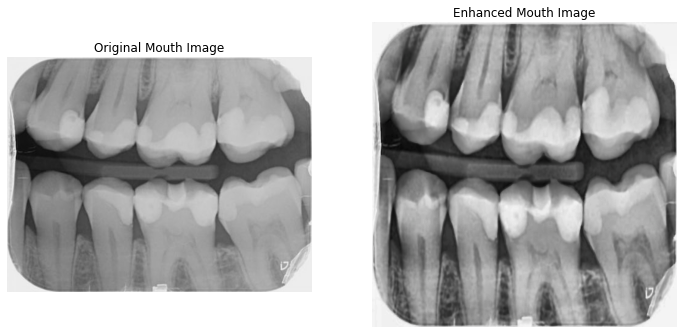

Enhanced Mouth Image saved as /mnt/data/enhanced_mouth.png


In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = "image.png"  # Update with actual path
input_img = cv2.imread(image_path)

if input_img is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Check if the image is grayscale (X-ray) or color (Mouth Image)
if len(input_img.shape) == 2 or input_img.shape[2] == 1:
    is_xray = True
    print("Detected: X-ray Image")
else:
    is_xray = False
    print("Detected: Color Mouth Image")

### **Processing for X-ray Images**
if is_xray:
    # Convert to grayscale (just in case it's a single-channel grayscale)
    xray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) if len(input_img.shape) == 3 else input_img

    # **1. Noise Reduction (Non-Local Means Denoising)**
    denoised_xray = cv2.fastNlMeansDenoising(xray_img, h=10, templateWindowSize=7, searchWindowSize=21)

    # **2. Contrast Enhancement (CLAHE - Adaptive Histogram Equalization)**
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    contrast_enhanced_xray = clahe.apply(denoised_xray)

    # **3. Edge and Detail Enhancement (Unsharp Masking)**
    gaussian_blur_xray = cv2.GaussianBlur(contrast_enhanced_xray, (5, 5), 0)
    sharpened_xray = cv2.addWeighted(contrast_enhanced_xray, 1.5, gaussian_blur_xray, -0.5, 0)

    # **4. Normalize & Standardize Image**
    final_xray = cv2.normalize(sharpened_xray, None, 0, 255, cv2.NORM_MINMAX)
    final_xray = cv2.resize(final_xray, (512, 512))  # Standardized size

    output_path = "/mnt/data/enhanced_xray.png"
    cv2.imwrite(output_path, final_xray)

    # **Display Original vs Enhanced X-ray**
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(xray_img, cmap="gray")
    ax[0].set_title("Original X-ray")
    ax[0].axis("off")

    ax[1].imshow(final_xray, cmap="gray")
    ax[1].set_title("Enhanced X-ray")
    ax[1].axis("off")

    plt.show()

    print(f"Enhanced X-ray saved as {output_path}")

### **Processing for Color Mouth Images**
else:
    # **1. Noise Reduction (Bilateral Filtering)**
    denoised_color = cv2.bilateralFilter(input_img, d=9, sigmaColor=75, sigmaSpace=75)

    # **2. Color & Contrast Enhancement**
    lab = cv2.cvtColor(denoised_color, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    enhanced_lab = cv2.merge((l, a, b))
    enhanced_color = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)  # Convert back to BGR

    # **3. Edge Enhancement (Unsharp Masking)**
    gaussian_blur_color = cv2.GaussianBlur(enhanced_color, (5, 5), 0)
    sharpened_color = cv2.addWeighted(enhanced_color, 1.5, gaussian_blur_color, -0.5, 0)

    # **4. Normalize & Standardize Image**
    final_color = cv2.normalize(sharpened_color, None, 0, 255, cv2.NORM_MINMAX)
    final_color = cv2.resize(final_color, (512, 512))  # Standardized size

    output_path = "/mnt/data/enhanced_mouth.png"
    cv2.imwrite(output_path, final_color)

    # **Display Original vs Enhanced Mouth Image**
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Mouth Image")
    ax[0].axis("off")

    ax[1].imshow(cv2.cvtColor(final_color, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Enhanced Mouth Image")
    ax[1].axis("off")

    plt.show()

    print(f"Enhanced Mouth Image saved as {output_path}")
